# Layout Analysis

Beyond simple text and lines, `natural-pdf` can use layout analysis models (like YOLO or DETR) to identify semantic regions within a page, such as paragraphs, tables, figures, headers, etc. This provides a higher-level understanding of the document structure.

Let's analyze the layout of our `01-practice.pdf`.

In [1]:
#%pip install "natural-pdf[all]"

In [2]:
from natural_pdf import PDF

# Load the PDF and get the page
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Analyze the layout using the default model
# This adds 'detected' Region objects to the page
# It returns an ElementCollection of the detected regions
page.analyze_layout()
detected_regions = page.find_all('region[source="detected"]')

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmp3drituox/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 1539.3ms


Speed: 4.1ms preprocess, 1539.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 800)


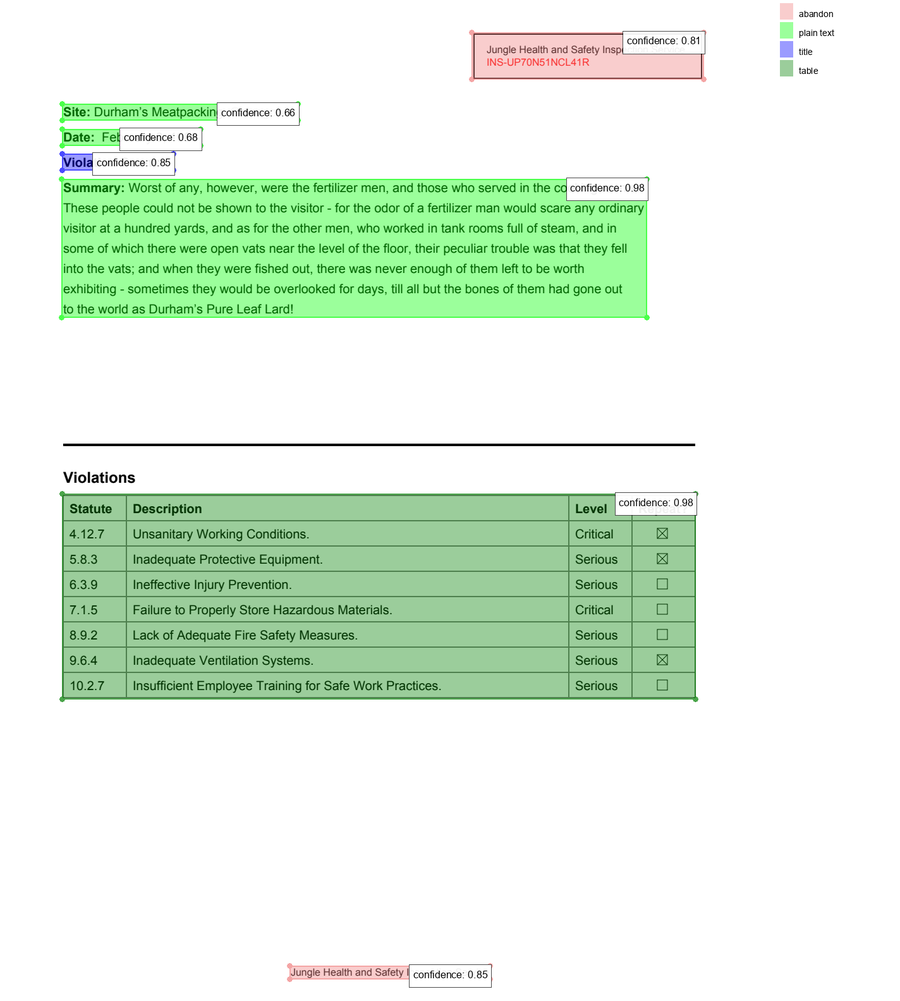

In [3]:
# Visualize all detected regions, using default colors based on type
page.clear_highlights() # Clear previous highlights
detected_regions.highlight(group_by='type', include_attrs=['confidence'])

# Show the image with region overlays
page.to_image(width=900)

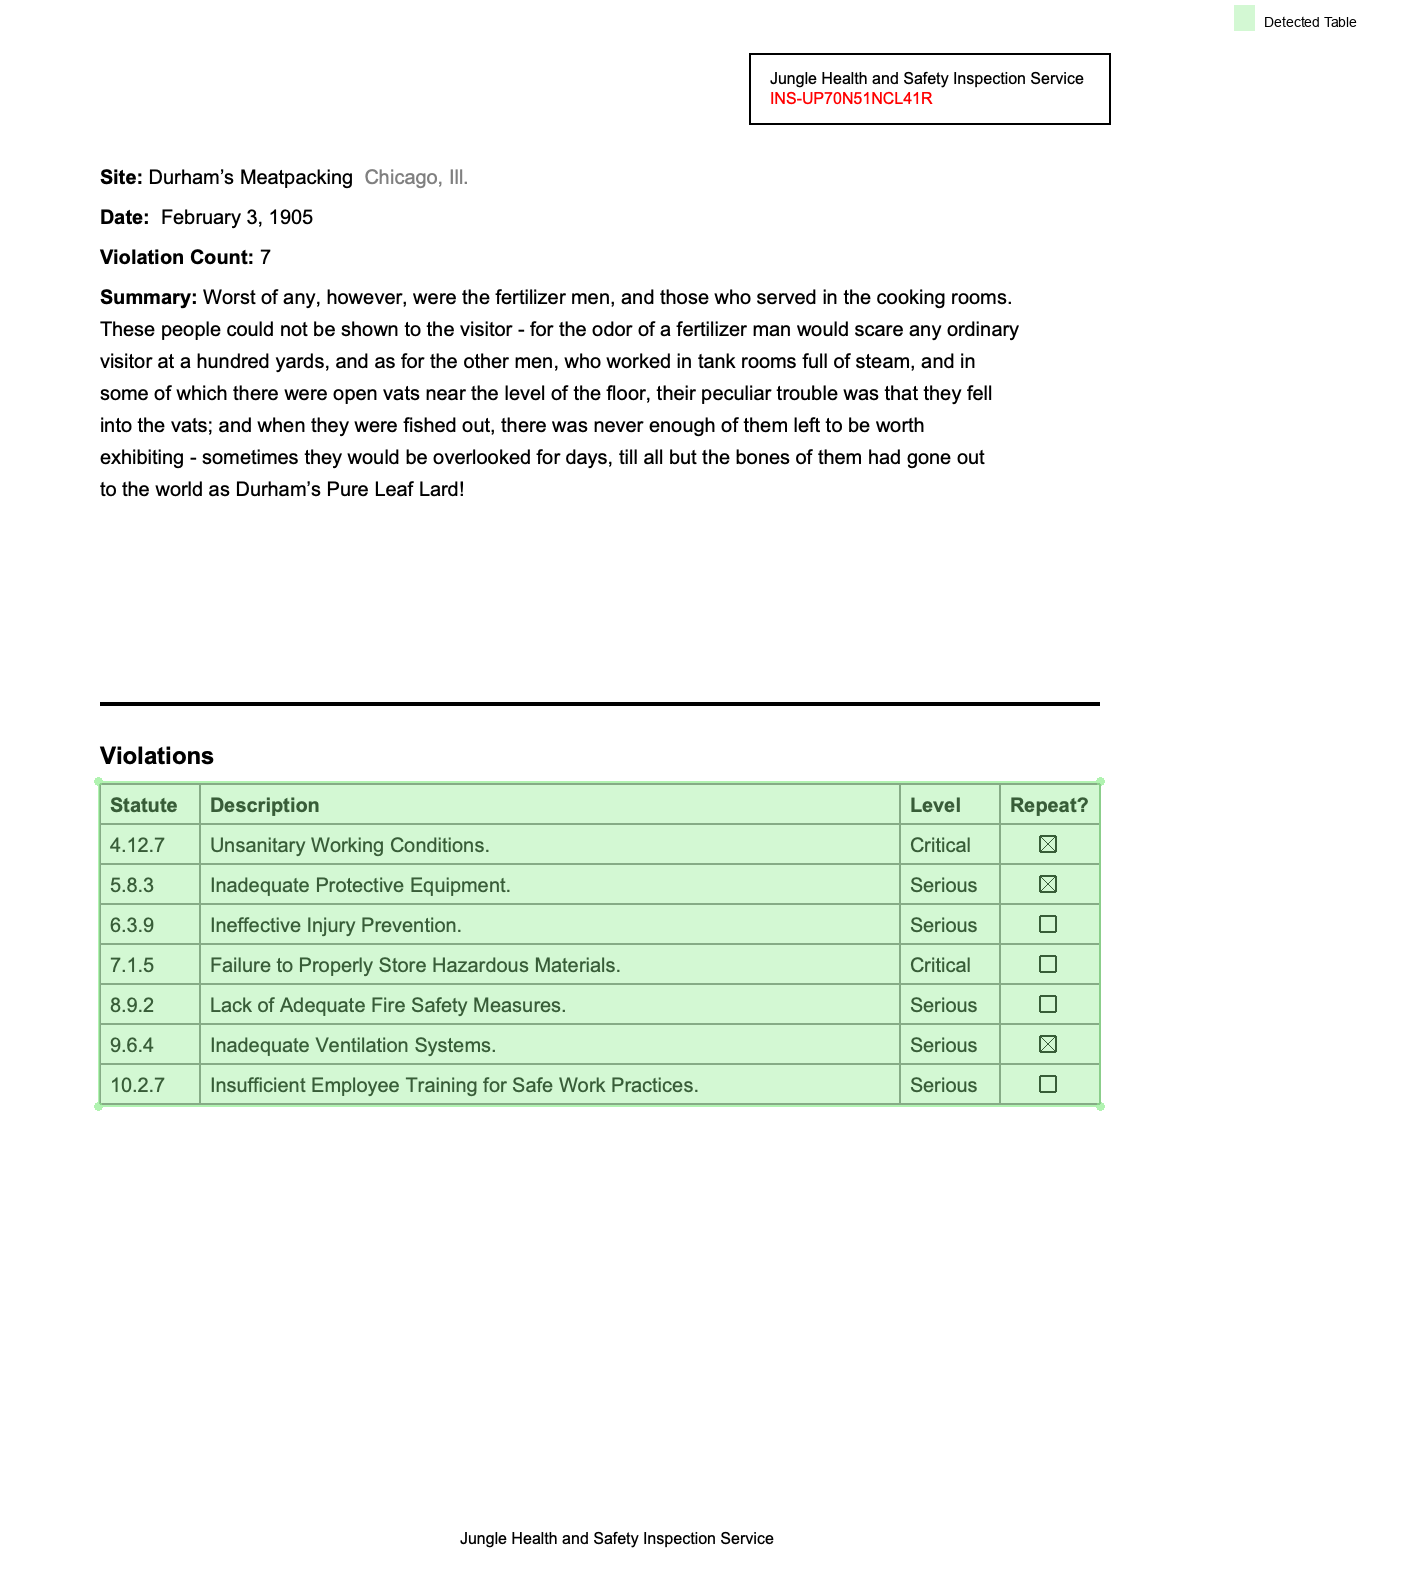

In [4]:
# Find and visualize only the detected table region(s)
tables = page.find_all('region[type=table]')
tables.show(color='lightgreen', label='Detected Table')

In [5]:
# Extract text specifically from the detected table region
table_region = tables.first # Assuming only one table was detected
# Extract text preserving layout
table_text_layout = table_region.extract_text(layout=True)
table_text_layout

'Statute Description Level Repeat?\n4.12.7 Unsanitary Working Conditions. Critical\n5.8.3 Inadequate Protective Equipment. Serious\n6.3.9 Ineffective Injury Prevention. Serious\n7.1.5 Failure to Properly Store Hazardous Materials. Critical\n8.9.2 Lack of Adequate Fire Safety Measures. Serious\n9.6.4 Inadequate Ventilation Systems. Serious\n10.2.7 Insufficient Employee Training for Safe Work Practices. Serious'

In [6]:
# Layout-detected regions can also be used for table extraction
# This can be more robust than the basic page.extract_tables()
# especially for tables without clear lines.
table_data = table_region.extract_table()
table_data

2025-04-30T20:18:51.316751Z [warning  ] Region (49.011173248291016, 390.88934326171875, 550.4767456054688, 553.45654296875): No cells found using 'text' method. lineno=1229 module=natural_pdf.elements.region


[2025-04-30 16:18:51,316] [ WARNING] region.py:1229 - Region (49.011173248291016, 390.88934326171875, 550.4767456054688, 553.45654296875): No cells found using 'text' method.


[]

Layout analysis provides structured `Region` objects. You can filter these regions by their predicted `type` and then perform actions like visualization or extracting text/tables specifically from those regions.

<div class="admonition note">
<p class="admonition-title">Layout Models and Configuration</p>

    *   Layout analysis requires external models. Ensure these are installed.
    *   You can specify different models (`engine='yolo'`, `engine='detr'`, `engine='paddle'`) or configurations (confidence thresholds, specific classes) via arguments to `page.analyze_layout()`. Different models may perform better on different document types.
    *   The detected regions are added to the page and can be found using selectors like `page.find_all('region[type=paragraph]')`.
</div>

``` 